In [1]:
from scripts.models import *
from scripts.utils import *
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression :)

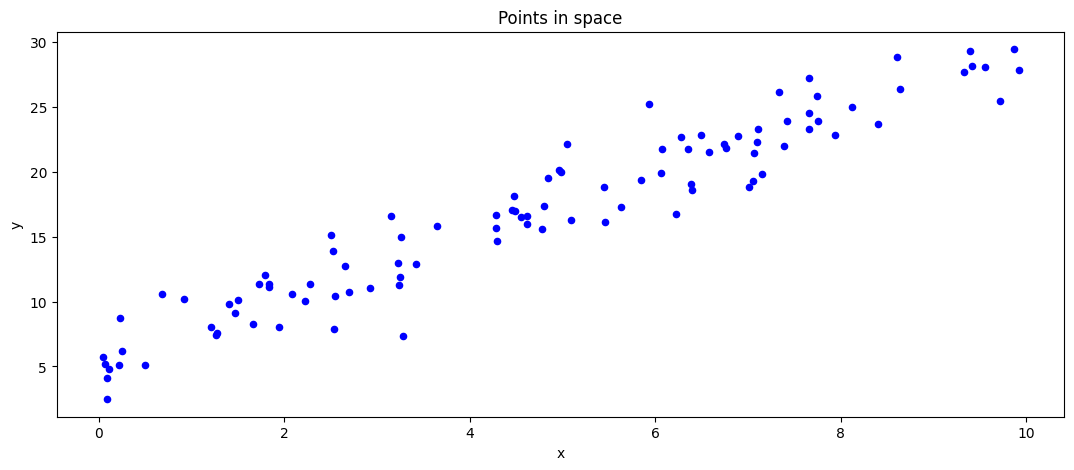

In [2]:
### Fake data
X = np.random.rand(100, 1) * 10 
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(100, 1) * 2  
y = true_slope * X + true_intercept + noise

plt.figure(figsize = (13,5))
plt.scatter(X,y, color = 'blue', s = 20)
plt.title('Points in space')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

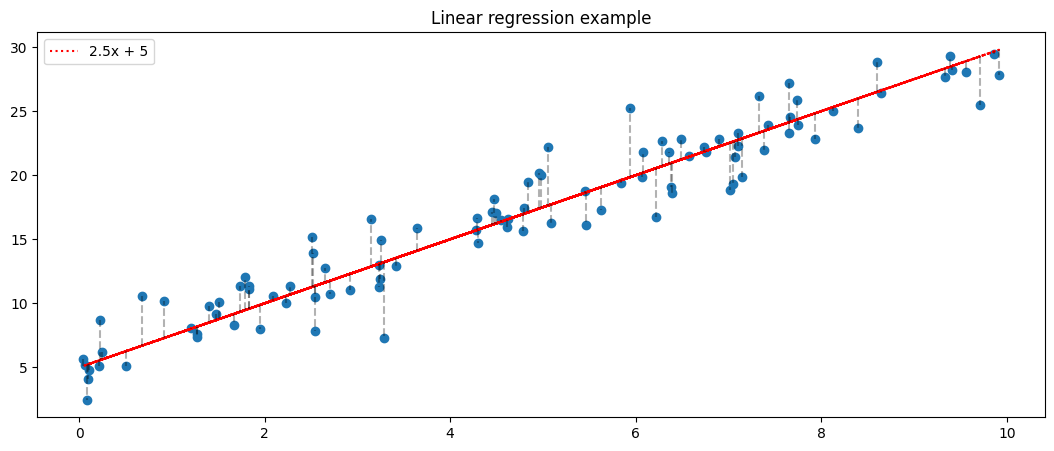

In [3]:
lr = 2.5*X + 5
plt.figure(figsize = (13,5))
plt.scatter(X,y)
plt.plot(X,lr, c = 'red', label = '2.5x + 5', linestyle = ':')
plt.title('Linear regression example')
for i in range(len(X)):
    plt.plot([X[i],X[i]], [lr[i],y[i]], color='black', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

In [4]:
lin_reg = LinearRegression(1)

2024-08-20 17:23:40.924700: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-08-20 17:23:40.924736: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-20 17:23:40.924759: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-20 17:23:40.924794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-20 17:23:40.924809: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001)
loss_metric = custom_metric('loss')
accuracy_metric = custom_metric('accuracy')
metrics = {'loss': loss_metric, 'accuracy': accuracy_metric}

In [6]:
lin_reg.compile(optimizer= optimizer, y_mean = np.mean(y), metrics = metrics)
logs = csv_logger(name = "test1.csv")

In [7]:
lin_reg.fit(X, y, epochs = 100, batch_size = 10, callbacks = [logs], verbose = 0)

Epoch 1/100
10/10 [==============================] - 0s 4ms/step - Loss: 804.9285 - Accuracy: -0.8297
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - Loss: 74.0936 - Accuracy: 0.8488
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - Loss: 90.2125 - Accuracy: 0.8023
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - Loss: 76.9625 - Accuracy: 0.8474
Epoch 5/100
 1/10 [==>...........................] - ETA: 0s - Loss: 53.9417 - Accuracy: 0.9058

2024-08-20 17:23:41.197985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 2ms/step - Loss: 75.4489 - Accuracy: 0.8357
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - Loss: 75.4371 - Accuracy: 0.8154
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - Loss: 61.9526 - Accuracy: 0.8492
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - Loss: 59.3304 - Accuracy: 0.8662
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - Loss: 62.6687 - Accuracy: 0.8402
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - Loss: 62.1512 - Accuracy: 0.8575
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - Loss: 63.4546 - Accuracy: 0.8666
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - Loss: 54.9429 - Accuracy: 0.8720
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - Loss: 57.2333 - Accuracy: 0.8774
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - Loss: 53.5199 - Accuracy: 0.8922
Epoch 1

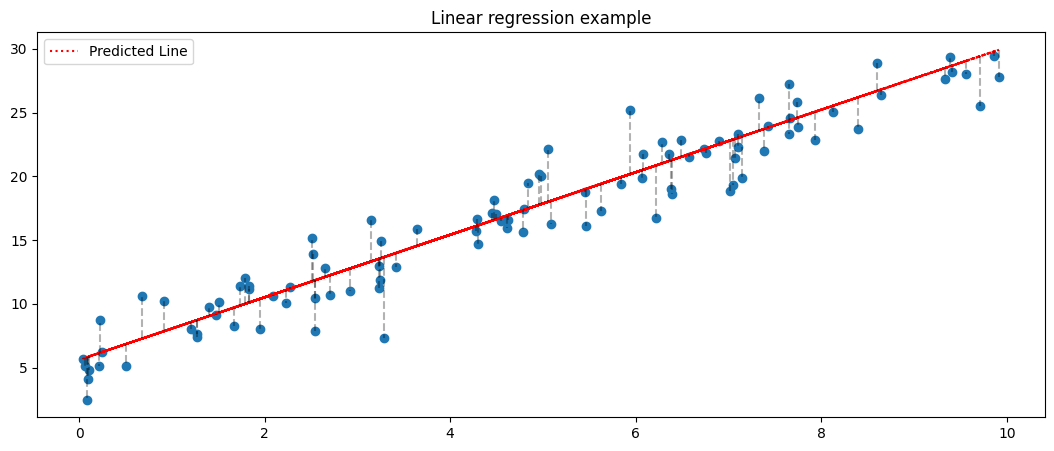

In [8]:
lr = lin_reg.trainable_variables[0][0].numpy() + X * lin_reg.trainable_variables[0][1].numpy()
plt.figure(figsize = (13,5))
plt.scatter(X,y)
plt.plot(X,lr, c = 'red', label = 'Predicted Line', linestyle = ':')
plt.title('Linear regression example')
for i in range(len(X)):
    plt.plot([X[i],X[i]], [lr[i],y[i]], color='black', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

In [9]:
animate_function('logs/test1.csv', X, y, name = 'training_animation.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


In [10]:
os.getcwd()

'/Users/manuelhernandez/Documents/Portfolio/ML from scratch/Linear Regression'